# Autocorr Time vs K

## (2D Square EA [J, -J, 1/2], Size=16, obc)

In [1]:
from autocorr_utils import *

In [2]:
import seaborn as sns

In [3]:
def data_process_pip(data_list, repeat, steps=100):
    autocorr_mean_list, autocorr_std_list = [], []    
    for data in data_list:
        data = np.reshape(data, [-1, repeat])
        autocorr_mean, autocorr_std = autocorr_est_combine(data, (-1, repeat), steps)
        autocorr_mean_list.append(autocorr_mean)
        autocorr_std_list.append(autocorr_std)
    return autocorr_mean_list, autocorr_std_list

In [4]:
def autocorr_time_est_pip(data_list, steps=5):
    time_list = []
    for data in data_list:
        autocorr_time = autocorr_time_est(data[:steps])
        time_list.append(autocorr_time)
    return time_list

------------
### J_seed = 0, Metropolis

In [107]:
with open('../data_2d_ea/autocorr_vs_K/metropolis_obc/size_16/ea_square_beta_1.000_q_1E7_metropolis_obc.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_0 = data_dict['q_history']

In [108]:
with open('../data_2d_ea/autocorr_vs_K/metropolis_obc/size_16/ea_square_beta_1.250_q_1E7_metropolis_obc.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_1 = data_dict['q_history']

In [109]:
with open('../data_2d_ea/autocorr_vs_K/metropolis_obc/size_16/ea_square_beta_1.500_q_1E7_metropolis_obc.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_2 = data_dict['q_history']

In [110]:
with open('../data_2d_ea/autocorr_vs_K/metropolis_obc/size_16/ea_square_beta_1.750_q_1E7_metropolis_obc.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_3 = data_dict['q_history']

In [111]:
with open('../data_2d_ea/autocorr_vs_K/metropolis_obc/size_16/ea_square_beta_2.000_q_1E7_metropolis_obc.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_4 = data_dict['q_history']

In [145]:
autocorr_mean_metro_list, autocorr_std_metro_list = [], []
for q_metro_data in q_metro_list:
    autocorr_q_metro_mean, autocorr_q_metro_std = autocorr_est_combine(q_metro_data, (2000, 5000), steps=500)
    autocorr_mean_metro_list.append(autocorr_q_metro_mean)
    autocorr_std_metro_list.append(autocorr_q_metro_std)

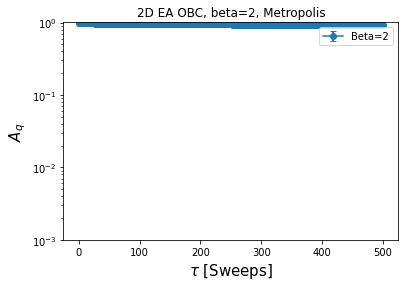

In [146]:
errbar_plot(autocorr_mean_metro_list[4], autocorr_std_metro_list[4], 2, f'2D EA OBC, beta=2, Metropolis')

In [147]:
beta_list = [1, 1.25, 1.5, 1.75, 2]

In [148]:
autocorr_time_metro_list = autocorr_time_est_pip(autocorr_mean_metro_list, steps=500)

In [149]:
index_metro, bias_metro = np.polyfit(beta_list, np.log(autocorr_time_metro_list), 1)

In [150]:
index_metro

1.8018935058984566

Text(0.5, 1.0, '2D (J, -J, 1/2), EA (Size=16, OBC), Autocorr VS K')

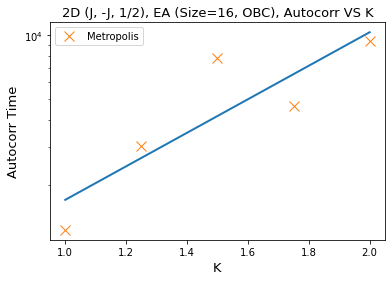

In [152]:
plt.plot(beta_list, np.exp(index_metro*np.array(beta_list) + bias_metro), linewidth=2)
plt.plot(beta_list, autocorr_time_metro_list, 'x', markersize=10, label='Metropolis')
plt.yscale('log')
plt.xlabel("K", fontsize=13)
plt.ylabel("Autocorr Time", fontsize=13)
plt.legend()
plt.title("2D (J, -J, 1/2), EA (Size=16, OBC), Autocorr VS K", fontsize=13)

#### We note here that the autocorr time of metropolis at low temperature such as K=1.8 is probably under-estimiated since the autocorr function converges too slowly.

In [73]:
beta_list = [0.5, 0.75, 1, 1.25, 1.5, 1.75]
autocorr_time_list = [autocorr_time_beta_0, autocorr_time_beta_1, autocorr_time_beta_2, 
                      autocorr_time_beta_3, autocorr_time_beta_4, autocorr_time_beta_5]
                      #autocorr_time_beta_6]

NameError: name 'autocorr_time_beta_0' is not defined

In [134]:
index_metropolis, bias = np.polyfit(beta_list, np.log(autocorr_time_list), 1)

In [135]:
index_metropolis

4.078373228711447

Text(0.5, 1.0, '2D (J, -J, 1/2) EA')

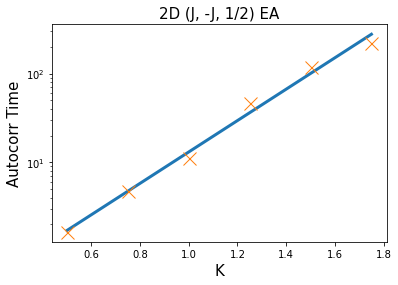

In [138]:
plt.plot(beta_list, np.exp(index_metropolis*np.array(beta_list) + bias), linewidth=3)
#plt.plot(beta_list, np.log(autocorr_time_list), 'x', markersize=13)
plt.plot(beta_list, autocorr_time_list, 'x', markersize=13)
plt.yscale('log')
plt.xlabel("K", fontsize=15)
plt.ylabel("Autocorr Time", fontsize=15)
plt.title("2D (J, -J, 1/2) EA", fontsize=15)

In [149]:
with open('../data_2d_ea/autocorr_vs_K/ea_square_size_64/ea_square_size_64_beta_0.500_h_0.000_q_2E7_metropolis_v0_frust.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_0 = data_dict['q_history']

In [153]:
shape, steps = (10000,1000), 100

In [154]:
autocorr_q_ea2d_beta_0_mean, autocorr_q_ea2d_beta_0_std = autocorr_est_combine(q_ea2d_beta_0, (10000, 1000), steps=100)

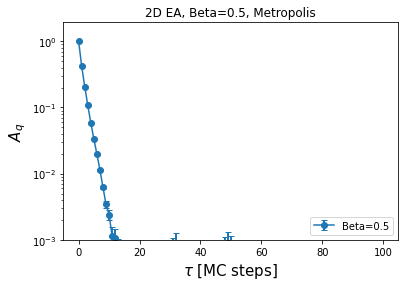

In [155]:
plt.errorbar(x=range(101), y=autocorr_q_ea2d_beta_0_mean, yerr=autocorr_q_ea2d_beta_0_std, 
             fmt='-o', capsize=3, elinewidth=2, label='Beta=0.5')
plt.yscale("log")
plt.ylim(10**-3)
plt.xlabel(r'$\tau$ [MC steps]', fontsize=15)
plt.ylabel(r'$A_{q}$', fontsize=15)
plt.title("2D EA, Beta=0.5, Metropolis")
plt.legend(loc='lower right')

In [159]:
autocorr_time_beta_0 = autocorr_time_est(autocorr_q_ea2d_beta_0_mean[:10])

In [160]:
print(f"autocorr time of beta=0.5 is: {autocorr_time_beta_0:.3f}.")

autocorr time of beta=0.5 is: 1.637.


In [161]:
with open('../data_2d_ea/autocorr_vs_K/ea_square_size_64/ea_square_size_64_beta_1.000_h_0.000_q_2E7_metropolis_v0_frust.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_1 = data_dict['q_history']

In [162]:
shape, steps = (10000,1000), 100

In [164]:
autocorr_q_ea2d_beta_1_mean, autocorr_q_ea2d_beta_1_std = autocorr_est_combine(q_ea2d_beta_1, (10000, 1000), steps=100)

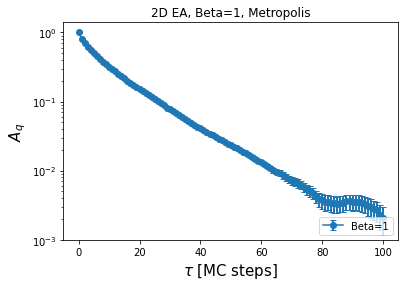

In [165]:
plt.errorbar(x=range(101), y=autocorr_q_ea2d_beta_1_mean, yerr=autocorr_q_ea2d_beta_1_std, 
             fmt='-o', capsize=3, elinewidth=2, label='Beta=1')
plt.yscale("log")
plt.ylim(10**-3)
plt.xlabel(r'$\tau$ [MC steps]', fontsize=15)
plt.ylabel(r'$A_{q}$', fontsize=15)
plt.title("2D EA, Beta=1, Metropolis")
plt.legend(loc='lower right')

In [166]:
autocorr_time_beta_1 = autocorr_time_est(autocorr_q_ea2d_beta_1_mean)

In [168]:
print(f"autocorr time of beta=1 is: {autocorr_time_beta_1:.3f}.")

autocorr time of beta=1 is: 17.132.


In [231]:
with open('../data_2d_ea/autocorr_vs_K/ea_square_size_64_frust/ea_square_size_64_beta_1.500_h_0.000_q_2E7_metropolis_v0_frust.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_2 = data_dict['q_history']

In [174]:
autocorr_q_ea2d_beta_2_mean, autocorr_q_ea2d_beta_2_std = autocorr_est_combine(q_ea2d_beta_2, (10000, 1000), steps=100)

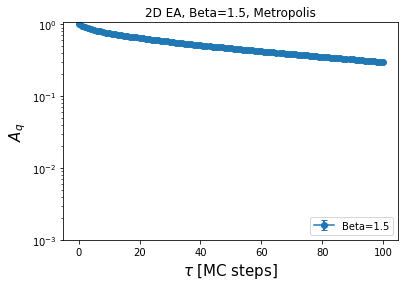

In [176]:
plt.errorbar(x=range(101), y=autocorr_q_ea2d_beta_2_mean, yerr=autocorr_q_ea2d_beta_2_std, 
             fmt='-o', capsize=3, elinewidth=2, label='Beta=1.5')
plt.yscale("log")
plt.ylim(10**-3)
plt.xlabel(r'$\tau$ [MC steps]', fontsize=15)
plt.ylabel(r'$A_{q}$', fontsize=15)
plt.title("2D EA, Beta=1.5, Metropolis")
plt.legend(loc='lower right')

In [182]:
autocorr_time_beta_2 = autocorr_time_est(autocorr_q_ea2d_beta_2_mean)

In [183]:
print(f"autocorr time of beta=1.5 is: {autocorr_time_beta_2:.3f}.")

autocorr time of beta=1.5 is: 93.874.


In [177]:
with open('../data_2d_ea/autocorr_vs_K/ea_square_size_64/ea_square_size_64_beta_2.000_h_0.000_q_2E7_metropolis_v0_frust.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_3 = data_dict['q_history']

In [178]:
autocorr_q_ea2d_beta_3_mean, autocorr_q_ea2d_beta_3_std = autocorr_est_combine(q_ea2d_beta_3, (10000, 1000), 100)

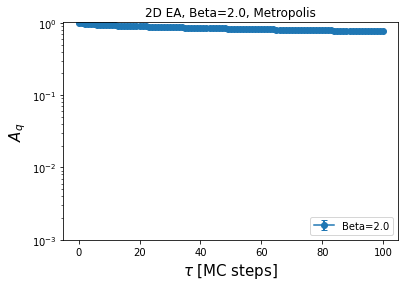

In [179]:
plt.errorbar(x=range(101), y=autocorr_q_ea2d_beta_3_mean, yerr=autocorr_q_ea2d_beta_3_std, 
             fmt='-o', capsize=3, elinewidth=2, label='Beta=2.0')
plt.yscale("log")
plt.ylim(10**-3)
plt.xlabel(r'$\tau$ [MC steps]', fontsize=15)
plt.ylabel(r'$A_{q}$', fontsize=15)
plt.title("2D EA, Beta=2.0, Metropolis")
plt.legend(loc='lower right')

In [180]:
autocorr_time_beta_3 = autocorr_time_est(autocorr_q_ea2d_beta_3_mean)

In [181]:
print(f"autocorr time of beta=2 is: {autocorr_time_beta_3:.3f}.")

autocorr time of beta=2 is: 433.738.


In [221]:
with open('../data_2d_ea/autocorr_vs_K/ea_square_size_64_frust/ea_square_size_64_beta_2.500_h_0.000_q_2E7_metropolis_v0_frust.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_4 = data_dict['q_history']

In [185]:
autocorr_q_ea2d_beta_4_mean, autocorr_q_ea2d_beta_4_std = autocorr_est_combine(q_ea2d_beta_4, (10000, 1000), 100)

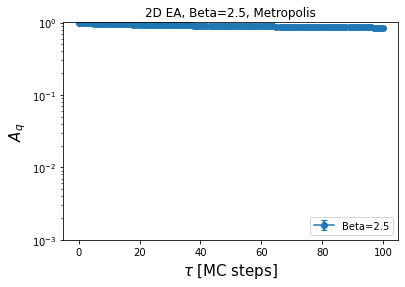

In [187]:
plt.errorbar(x=range(101), y=autocorr_q_ea2d_beta_4_mean, yerr=autocorr_q_ea2d_beta_4_std, 
             fmt='-o', capsize=3, elinewidth=2, label='Beta=2.5')
plt.yscale("log")
plt.ylim(10**-3)
plt.xlabel(r'$\tau$ [MC steps]', fontsize=15)
plt.ylabel(r'$A_{q}$', fontsize=15)
plt.title("2D EA, Beta=2.5, Metropolis")
plt.legend(loc='lower right')

In [188]:
autocorr_time_beta_4 = autocorr_time_est(autocorr_q_ea2d_beta_4_mean)

In [189]:
print(f"autocorr time of beta=2.5 is: {autocorr_time_beta_4:.3f}.")

autocorr time of beta=2.5 is: 748.580.


In [198]:
with open('../data_2d_ea/autocorr_vs_K/ea_square_size_64/ea_square_size_64_beta_3.000_h_0.000_q_2E7_metropolis_v0_frust.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_5 = data_dict['q_history']

In [206]:
autocorr_q_ea2d_beta_5_mean, autocorr_q_ea2d_beta_5_std = autocorr_est_combine(q_ea2d_beta_5, (2500, 4000), 400)

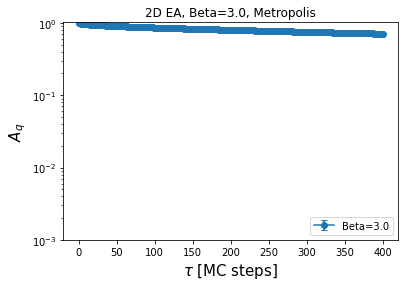

In [207]:
plt.errorbar(x=range(401), y=autocorr_q_ea2d_beta_5_mean, yerr=autocorr_q_ea2d_beta_5_std, 
             fmt='-o', capsize=3, elinewidth=2, label='Beta=3.0')
plt.yscale("log")
plt.ylim(10**-3)
plt.xlabel(r'$\tau$ [MC steps]', fontsize=15)
plt.ylabel(r'$A_{q}$', fontsize=15)
plt.title("2D EA, Beta=3.0, Metropolis")
plt.legend(loc='lower right')

In [208]:
autocorr_time_beta_5 = autocorr_time_est(autocorr_q_ea2d_beta_5_mean)

In [209]:
print(f"autocorr time of beta=3.0 is: {autocorr_time_beta_5:.3f}.")

autocorr time of beta=3.0 is: 1360.895.


In [214]:
beta_list = [0.5, 1, 1.5, 2, 2.5]
autocorr_time_list = [autocorr_time_beta_0, autocorr_time_beta_1, autocorr_time_beta_2, 
                      autocorr_time_beta_3, autocorr_time_beta_4]

In [215]:
index_metropolis, bias = np.polyfit(beta_list, np.log(autocorr_time_list), 1)

In [216]:
index_metropolis

3.096366819614588

Text(0.5, 1.0, '2D (J, -J, 1/2) EA (Size=64)')

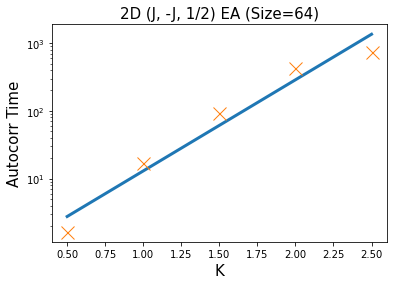

In [219]:
plt.plot(beta_list, np.exp(index_metropolis*np.array(beta_list) + bias), linewidth=3)
#plt.plot(beta_list, np.log(autocorr_time_list), 'x', markersize=13)
plt.plot(beta_list, autocorr_time_list, 'x', markersize=13)
plt.yscale('log')
plt.xlabel("K", fontsize=15)
plt.ylabel("Autocorr Time", fontsize=15)
plt.title("2D (J, -J, 1/2) EA (Size=64)", fontsize=15)

In [279]:
with open('../data_2d_ea/autocorr_vs_K/ea_square_size_32/ea_square_size_32_beta_0.500_h_0.000_q_2E7_metropolis_v0.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_0 = data_dict['q_history']

In [281]:
with open('../data_2d_ea/autocorr_vs_K/ea_square_size_32/ea_square_size_32_beta_0.750_h_0.000_q_2E7_metropolis_v0.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_1 = data_dict['q_history']

In [244]:
with open('../data_2d_ea/autocorr_vs_K/ea_square_size_32/ea_square_size_32_beta_1.000_h_0.000_q_2E7_metropolis_v0.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_2 = data_dict['q_history']

In [256]:
with open('../data_2d_ea/autocorr_vs_K/ea_square_size_32/ea_square_size_32_beta_1.250_h_0.000_q_2E7_metropolis_v0.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_3 = data_dict['q_history']

In [ ]:
with open('../data_2d_ea/autocorr_vs_K/ea_square_size_32/ea_square_size_32_beta_1.500_h_0.000_q_2E7_metropolis_v0.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_4 = data_dict['q_history']

In [ ]:
with open('../data_2d_ea/autocorr_vs_K/ea_square_size_32/ea_square_size_32_beta_1.750_h_0.000_q_2E7_metropolis_v0.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_5 = data_dict['q_history']

In [ ]:
with open('../data_2d_ea/autocorr_vs_K/ea_square_size_32/ea_square_size_32_beta_2.000_h_0.000_q_2E7_metropolis_v0.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_6 = data_dict['q_history']

In [283]:
autocorr_q_ea2d_beta_0_mean, autocorr_q_ea2d_beta_0_std = autocorr_est_combine(q_ea2d_beta_0, (10000, 1000), steps=100)

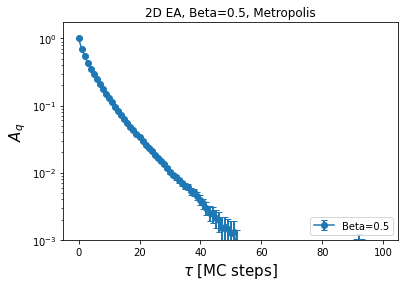

In [284]:
plt.errorbar(x=range(101), y=autocorr_q_ea2d_beta_0_mean, yerr=autocorr_q_ea2d_beta_0_std, 
             fmt='-o', capsize=3, elinewidth=2, label='Beta=0.5')
plt.yscale("log")
plt.ylim(10**-3)
plt.xlabel(r'$\tau$ [MC steps]', fontsize=15)
plt.ylabel(r'$A_{q}$', fontsize=15)
plt.title("2D EA, Beta=0.5, Metropolis")
plt.legend(loc='lower right')

In [248]:
q_ea2d_list = [q_ea2d_beta_0, q_ea2d_beta_1, q_ea2d_beta_2, 
               q_ea2d_beta_3, q_ea2d_beta_4, q_ea2d_beta_5, 
               q_ea2d_beta_7]

In [249]:
autocorr_mean_list = []

In [251]:
for q_ea2d_data in q_ea2d_list:
    autocorr_q_ea2d_mean, autocorr_q_ea2d_std = autocorr_est_combine(q_ea2d_data, (10000, 1000), steps=100)
    autocorr_mean_list.append(autocorr_q_ea2d_mean)

In [285]:
autocorr_time_beta_0 = autocorr_time_est(autocorr_mean_list[0][:40])

In [288]:
autocorr_time_beta_1 = autocorr_time_est(autocorr_mean_list[1][:50])

In [289]:
autocorr_time_beta_2 = autocorr_time_est(autocorr_mean_list[2])

In [290]:
autocorr_time_beta_3 = autocorr_time_est(autocorr_q_ea2d_beta_3_mean)

In [291]:
beta_list = [0.5, 0.75, 1, 1.25, 
             1.5, 1.75, 2]
autocorr_time_list = [autocorr_time_beta_0, autocorr_time_beta_1, autocorr_time_beta_2, 
                      autocorr_time_beta_3, autocorr_time_beta_4, autocorr_time_beta_5, 
                      autocorr_time_beta_6]

In [292]:
index_metropolis, bias = np.polyfit(beta_list, np.log(autocorr_time_list), 1)

In [293]:
index_metropolis

9.058788586463308

Text(0.5, 1.0, '2D (J, -J, 1/2) EA (Size=32)')

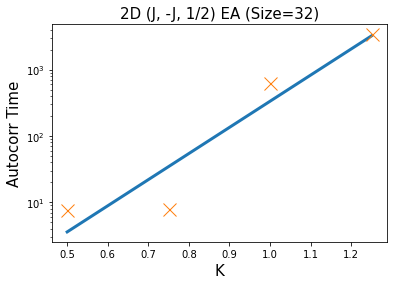

In [294]:
plt.plot(beta_list, np.exp(index_metropolis*np.array(beta_list) + bias), linewidth=3)
#plt.plot(beta_list, np.log(autocorr_time_list), 'x', markersize=13)
plt.plot(beta_list, autocorr_time_list, 'x', markersize=13)
plt.yscale('log')
plt.xlabel("K", fontsize=15)
plt.ylabel("Autocorr Time", fontsize=15)
plt.title("2D (J, -J, 1/2) EA (Size=32)", fontsize=15)

In [447]:
with open('../data_2d_ea/autocorr_vs_K/ea_square_size_16_metropolis/ea_square_size_16_beta_0.500_h_0.000_q_1E7_metropolis_v0.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_0 = data_dict['q_history']

In [448]:
with open('../data_2d_ea/autocorr_vs_K/ea_square_size_16_metropolis/ea_square_size_16_beta_0.750_h_0.000_q_1E7_metropolis_v0.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_1 = data_dict['q_history']

In [449]:
with open('../data_2d_ea/autocorr_vs_K/ea_square_size_16_metropolis/ea_square_size_16_beta_1.000_h_0.000_q_1E7_metropolis_v0.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_2 = data_dict['q_history']

In [450]:
with open('../data_2d_ea/autocorr_vs_K/ea_square_size_16_metropolis/ea_square_size_16_beta_1.250_h_0.000_q_1E7_metropolis_v0.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_3 = data_dict['q_history']

In [451]:
with open('../data_2d_ea/autocorr_vs_K/ea_square_size_16_metropolis/ea_square_size_16_beta_1.500_h_0.000_q_1E7_metropolis_v0.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_4 = data_dict['q_history']

In [452]:
q_ea2d_list = [q_ea2d_beta_0, q_ea2d_beta_1, q_ea2d_beta_2, q_ea2d_beta_3, q_ea2d_beta_4]

In [453]:
autocorr_mean_list = []

In [454]:
for q_ea2d_data in q_ea2d_list:
    autocorr_q_ea2d_mean, autocorr_q_ea2d_std = autocorr_est_combine(q_ea2d_data, (10000, 1000), steps=100)
    autocorr_mean_list.append(autocorr_q_ea2d_mean)

In [ ]:
plt.errorbar(x=range(101), y=autocorr_q_ea2d_beta_0_mean, yerr=autocorr_q_ea2d_beta_0_std, 
             fmt='-o', capsize=3, elinewidth=2, label='Beta=0.5')
plt.yscale("log")
plt.ylim(10**-3)
plt.xlabel(r'$\tau$ [MC steps]', fontsize=15)
plt.ylabel(r'$A_{q}$', fontsize=15)
plt.title("2D EA, Beta=0.5, Metropolis")
plt.legend(loc='lower right')

In [467]:
autocorr_time_beta_0 = autocorr_time_est(autocorr_mean_list[0][:60])

In [468]:
autocorr_time_beta_1 = autocorr_time_est(autocorr_mean_list[1][:50])

In [469]:
autocorr_time_beta_2 = autocorr_time_est(autocorr_mean_list[2])

In [470]:
autocorr_time_beta_3 = autocorr_time_est(autocorr_mean_list[3])

In [471]:
autocorr_time_beta_4 = autocorr_time_est(autocorr_mean_list[4])

In [561]:
beta_list = [0.5, 0.75, 1, 1.25, 1.5]
autocorr_time_list = [autocorr_time_beta_0, autocorr_time_beta_1, autocorr_time_beta_2, 
                      autocorr_time_beta_3, autocorr_time_beta_4]

In [562]:
index_metropolis, bias = np.polyfit(beta_list, np.log(autocorr_time_list), 1)

In [567]:
index_metropolis

7.273445710307033

Text(0.5, 1.0, '2D (J, -J, 1/2) EA (Size=16)')

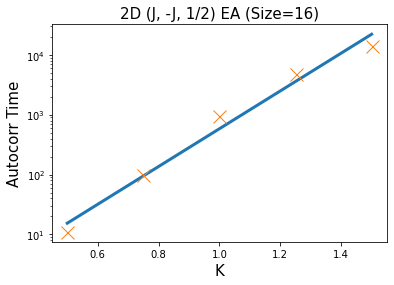

In [563]:
plt.plot(beta_list, np.exp(index_metropolis*np.array(beta_list) + bias), linewidth=3)
#plt.plot(beta_list, np.log(autocorr_time_list), 'x', markersize=13)
plt.plot(beta_list, autocorr_time_list, 'x', markersize=13)
plt.yscale('log')
plt.xlabel("K", fontsize=15)
plt.ylabel("Autocorr Time", fontsize=15)
plt.title("2D (J, -J, 1/2) EA (Size=16)", fontsize=15)

In [371]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice/ea_square_size_8/j_seed_0/ea_square_size_8_beta_0.500_4E3_m_tensor_torch_v1.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_0_v1 = data_dict['q_list']

In [372]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice/ea_square_size_8/j_seed_0/ea_square_size_8_beta_0.500_4E3_m_tensor_torch_v2.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_0_v2 = data_dict['q_list']

In [373]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice/ea_square_size_8/j_seed_0/ea_square_size_8_beta_0.500_4E3_m_tensor_torch_v3.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_0_v3 = data_dict['q_list']

In [374]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice/ea_square_size_8/j_seed_0/ea_square_size_8_beta_0.500_4E3_m_tensor_torch_v4.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_0_v4 = data_dict['q_list']

In [375]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice/ea_square_size_8/j_seed_0/ea_square_size_8_beta_0.500_4E3_m_tensor_torch_v5.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_0_v5 = data_dict['q_list']

In [376]:
q_ea2d_beta_0_v1 = np.array(q_ea2d_beta_0_v1).reshape((80, 1000))
q_ea2d_beta_0_v2 = np.array(q_ea2d_beta_0_v2).reshape((80, 1000))
q_ea2d_beta_0_v3 = np.array(q_ea2d_beta_0_v3).reshape((80, 1000))
q_ea2d_beta_0_v4 = np.array(q_ea2d_beta_0_v4).reshape((80, 1000))
q_ea2d_beta_0_v5 = np.array(q_ea2d_beta_0_v5).reshape((80, 1000))

<AxesSubplot:ylabel='Count'>

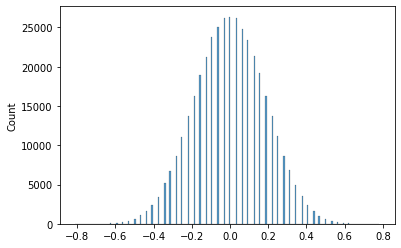

In [153]:
sns.histplot(np.reshape(q_ea2d_beta_0_tensor, -1))

In [377]:
q_ea2d_beta_0_tensor = np.concatenate([q_ea2d_beta_0_v1, q_ea2d_beta_0_v2, 
                                       q_ea2d_beta_0_v3, q_ea2d_beta_0_v4, 
                                       q_ea2d_beta_0_v5], axis=0)

In [378]:
autocorr_q_ea2d_beta_0_tensor_mean, autocorr_q_ea2d_beta_0_tensor_std = autocorr_est_combine(q_ea2d_beta_0_tensor, (400, 1000), steps=100)

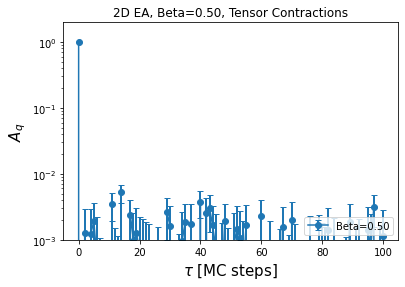

In [379]:
plt.errorbar(x=range(101), y=autocorr_q_ea2d_beta_0_tensor_mean, yerr=autocorr_q_ea2d_beta_0_tensor_std, 
             fmt='-o', capsize=3, elinewidth=2, label='Beta=0.50')
plt.yscale("log")
plt.ylim(10**-3)
plt.xlabel(r'$\tau$ [MC steps]', fontsize=15)
plt.ylabel(r'$A_{q}$', fontsize=15)
plt.title("2D EA, Beta=0.50, Tensor Contractions")
plt.legend(loc='lower right')

In [380]:
autocorr_time_beta_0_tensor = np.sum(autocorr_q_ea2d_beta_0_tensor_mean) - 1/2

In [166]:
autocorr_time_beta_0_tensor

0.48446905721231515

In [381]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice/ea_square_size_8/j_seed_0/ea_square_size_8_beta_1.500_4E3_m_tensor_torch_v1.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_4_v1 = data_dict['q_list']

In [382]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice/ea_square_size_8/j_seed_0/ea_square_size_8_beta_1.500_4E3_m_tensor_torch_v2.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_4_v2 = data_dict['q_list']

In [383]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice/ea_square_size_8/j_seed_0/ea_square_size_8_beta_1.500_4E3_m_tensor_torch_v3.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_4_v3 = data_dict['q_list']

In [384]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice/ea_square_size_8/j_seed_0/ea_square_size_8_beta_1.500_4E3_m_tensor_torch_v4.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_4_v4 = data_dict['q_list']

In [385]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice/ea_square_size_8/j_seed_0/ea_square_size_8_beta_1.500_4E3_m_tensor_torch_v5.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_4_v5 = data_dict['q_list']

In [386]:
q_ea2d_beta_4_v1 = np.array(q_ea2d_beta_4_v1).reshape((80, 1000))
q_ea2d_beta_4_v2 = np.array(q_ea2d_beta_4_v2).reshape((80, 1000))
q_ea2d_beta_4_v3 = np.array(q_ea2d_beta_4_v3).reshape((80, 1000))
q_ea2d_beta_4_v4 = np.array(q_ea2d_beta_4_v4).reshape((80, 1000))
q_ea2d_beta_4_v5 = np.array(q_ea2d_beta_4_v5).reshape((80, 1000))

In [387]:
q_ea2d_beta_4_tensor = np.concatenate([q_ea2d_beta_4_v1, q_ea2d_beta_4_v2, 
                                       q_ea2d_beta_4_v3, q_ea2d_beta_4_v4, 
                                       q_ea2d_beta_4_v5], axis=0)

<AxesSubplot:ylabel='Count'>

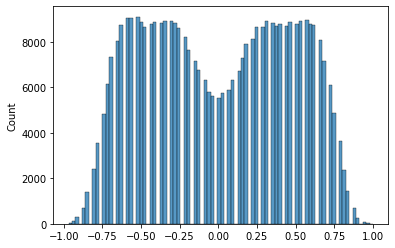

In [115]:
sns.histplot(np.reshape(q_ea2d_beta_4_tensor, -1))

In [388]:
autocorr_q_ea2d_beta_4_tensor_mean, autocorr_q_ea2d_beta_4_tensor_std = autocorr_est_combine(q_ea2d_beta_4_tensor, (400, 1000), steps=100)

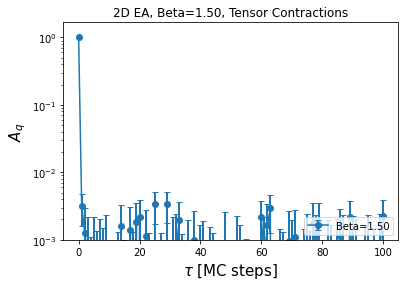

In [127]:
plt.errorbar(x=range(101), y=autocorr_q_ea2d_beta_4_tensor_mean, yerr=autocorr_q_ea2d_beta_4_tensor_std, 
             fmt='-o', capsize=3, elinewidth=2, label='Beta=1.50')
plt.yscale("log")
plt.ylim(10**-3)
plt.xlabel(r'$\tau$ [MC steps]', fontsize=15)
plt.ylabel(r'$A_{q}$', fontsize=15)
plt.title("2D EA, Beta=1.50, Tensor Contractions")
plt.legend(loc='lower right')

In [389]:
autocorr_time_beta_4_tensor = np.sum(autocorr_q_ea2d_beta_4_tensor_mean)

In [390]:
autocorr_time_beta_4_tensor

0.9804683443911134

In [391]:
autocorr_time_beta_4_tensor = autocorr_time_est(autocorr_q_ea2d_beta_4_tensor_mean[:4])

In [392]:
autocorr_time_beta_4_tensor

0.43158420575732626

In [6]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice_metro/ea_square_size_8_metropolis/ea_square_beta_0.500_q_1E7_metropolis.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_0_metro = data_dict['q_history']

In [7]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice_metro/ea_square_size_8_metropolis/ea_square_beta_0.750_q_1E7_metropolis.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_1_metro = data_dict['q_history']

In [8]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice_metro/ea_square_size_8_metropolis/ea_square_beta_1.000_q_1E7_metropolis.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_2_metro = data_dict['q_history']

In [441]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice_metro/ea_square_size_8_metropolis/ea_square_beta_1.250_q_1E7_metropolis.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_3_metro = data_dict['q_history']

In [10]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice_metro/ea_square_size_8_metropolis/ea_square_beta_1.500_q_1E7_metropolis.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_4_metro = data_dict['q_history']

In [314]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice_metro/ea_square_size_8_metropolis/ea_square_beta_1.750_q_1E7_metropolis.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_5_metro = data_dict['q_history']

In [419]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice_metro/ea_square_size_8_metropolis/ea_square_beta_2.000_q_1E7_metropolis.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_6_metro = data_dict['q_history']

In [423]:
q_ea2d_beta_2_metro

(10000, 1000)

<AxesSubplot:ylabel='Count'>

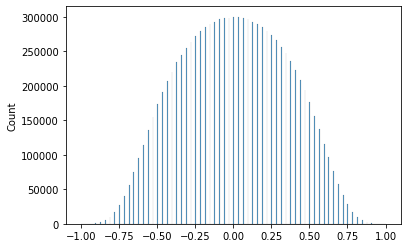

In [509]:
sns.histplot(q_ea2d_beta_2_metro.reshape(-1))

<AxesSubplot:ylabel='Count'>

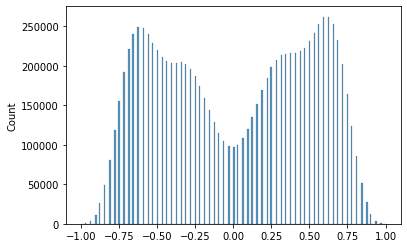

In [508]:
sns.histplot(q_ea2d_beta_6_metro.reshape(-1))

In [442]:
data_list = [q_ea2d_beta_2_metro, q_ea2d_beta_3_metro, q_ea2d_beta_4_metro, 
             q_ea2d_beta_5_metro, q_ea2d_beta_6_metro]

In [443]:
autocorr_mean_metro_list, autocorr_std_metro_list = data_process_pip(data_list, 1000, steps=100)

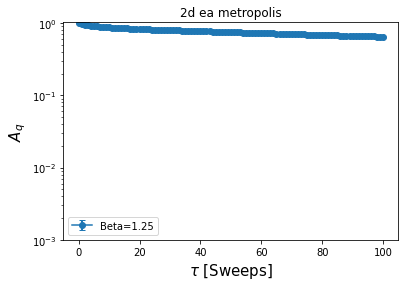

In [450]:
errbar_plot(autocorr_mean_metro_list[1], autocorr_std_metro_list[1], 1.25, '2d ea metropolis')

In [514]:
autocorr_time_metro_list = autocorr_time_est_pip(autocorr_mean_metro_list, steps=10)

In [515]:
autocorr_time_metro_list

[34.889137593954494,
 73.56682265791599,
 111.1783122510455,
 133.27597983035804,
 149.74614228631765]

In [113]:
beta_list = [0.5, 0.75, 1, 1.25, 1.5]
autocorr_time_metro_list = [autocorr_time_beta_0_metro, autocorr_time_beta_1_metro, 
                            autocorr_time_beta_2_metro, autocorr_time_beta_3_metro, 
                            autocorr_time_beta_4_metro]

In [114]:
index_metro, bias_metro = np.polyfit(beta_list, np.log(autocorr_time_metro_list), 1)

In [298]:
autocorr_time_metro_list

[2.460623018652133,
 19.659147206788376,
 83.24732688442892,
 288.61323709867946,
 759.5398389131852]

In [194]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice_metro/ea_square_size_8/j_seed_0/ea_square_size_8_beta_0.500_1E4_m_tm_exact_torch_v1.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_0_tm_exact = data_dict['q_list']

In [195]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice_metro/ea_square_size_8/j_seed_0/ea_square_size_8_beta_0.750_1E4_m_tm_exact_torch_v2.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_1_tm_exact = data_dict['q_list']

In [196]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice_metro/ea_square_size_8/j_seed_0/ea_square_size_8_beta_1.000_1E4_m_tm_exact_torch_v3.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_2_tm_exact = data_dict['q_list']

In [197]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice_metro/ea_square_size_8/j_seed_0/ea_square_size_8_beta_1.250_1E4_m_tm_exact_torch_v4.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_3_tm_exact = data_dict['q_list']

In [198]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice_metro/ea_square_size_8/j_seed_0/ea_square_size_8_beta_1.500_1E4_m_tm_exact_torch_v5.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_4_tm_exact = data_dict['q_list']

In [199]:
q_ea2d_beta_0_tm_exact = np.array(q_ea2d_beta_0_tm_exact).reshape((30, 500))
q_ea2d_beta_1_tm_exact = np.array(q_ea2d_beta_1_tm_exact).reshape((30, 500))
q_ea2d_beta_2_tm_exact = np.array(q_ea2d_beta_2_tm_exact).reshape((30, 500))
q_ea2d_beta_3_tm_exact = np.array(q_ea2d_beta_3_tm_exact).reshape((30, 500))
q_ea2d_beta_4_tm_exact = np.array(q_ea2d_beta_4_tm_exact).reshape((30, 500))

In [200]:
autocorr_q_ea2d_beta_0_tm_mean, autocorr_q_ea2d_beta_0_tm_std = autocorr_est_combine(q_ea2d_beta_0_tm_exact, (30, 500), steps=100)
autocorr_q_ea2d_beta_0_tm_mean, autocorr_q_ea2d_beta_0_tm_std = autocorr_est_combine(q_ea2d_beta_0_tm_exact, (30, 500), steps=100)
autocorr_q_ea2d_beta_0_tm_mean, autocorr_q_ea2d_beta_0_tm_std = autocorr_est_combine(q_ea2d_beta_0_tm_exact, (30, 500), steps=100)
autocorr_q_ea2d_beta_0_tm_mean, autocorr_q_ea2d_beta_0_tm_std = autocorr_est_combine(q_ea2d_beta_0_tm_exact, (30, 500), steps=100)
autocorr_q_ea2d_beta_0_tm_mean, autocorr_q_ea2d_beta_0_tm_std = autocorr_est_combine(q_ea2d_beta_0_tm_exact, (30, 500), steps=100)

In [201]:
autocorr_time_beta_0_tm = autocorr_time_est(autocorr_q_ea2d_beta_0_tm_mean[:5])
autocorr_time_beta_1_tm = autocorr_time_est(autocorr_q_ea2d_beta_1_tm_mean[:5])
autocorr_time_beta_2_tm = autocorr_time_est(autocorr_q_ea2d_beta_2_tm_mean[:])
autocorr_time_beta_3_tm = autocorr_time_est(autocorr_q_ea2d_beta_3_tm_mean[:])
autocorr_time_beta_4_tm = autocorr_time_est(autocorr_q_ea2d_beta_4_tm_mean[:])

In [202]:
autocorr_time_tm_exact_list = [autocorr_time_beta_0_tm, autocorr_time_beta_1_tm, 
                               autocorr_time_beta_2_tm, autocorr_time_beta_3_tm,
                               autocorr_time_beta_4_tm]

In [203]:
autocorr_time_tm_exact_list

[2.508167367407223,
 2.466407309767159,
 43.52658415543188,
 79.3207727423776,
 98.62303493774984]

In [161]:
autocorr_time_metro_list

[2.460623018652133,
 19.659147206788376,
 83.24732688442892,
 288.61323709867946,
 759.5398389131852]

In [165]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice_metro/ea_square_size_8/j_seed_0/ea_square_size_8_beta_0.500_4E3_m_tensor_torch_v5.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_0_v5 = data_dict['q_list']

In [166]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice_metro/ea_square_size_8/j_seed_0/ea_square_size_8_beta_0.500_4E3_m_tensor_torch_v2.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_0_v2 = data_dict['q_list']

In [167]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice_metro/ea_square_size_8/j_seed_0/ea_square_size_8_beta_0.500_4E3_m_tensor_torch_v3.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_0_v3 = data_dict['q_list']

In [168]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice_metro/ea_square_size_8/j_seed_0/ea_square_size_8_beta_0.750_4E3_m_tensor_torch_v5.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_1_v5 = data_dict['q_list']

In [169]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice_metro/ea_square_size_8/j_seed_0/ea_square_size_8_beta_0.750_4E3_m_tensor_torch_v3.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_1_v3 = data_dict['q_list']

In [170]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice_metro/ea_square_size_8/j_seed_0/ea_square_size_8_beta_1.000_4E3_m_tensor_torch_v3.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_2_v3 = data_dict['q_list']

In [171]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice_metro/ea_square_size_8/j_seed_0/ea_square_size_8_beta_1.000_4E3_m_tensor_torch_v5.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_2_v5 = data_dict['q_list']

In [440]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice_metro/ea_square_size_8/j_seed_0/ea_square_size_8_beta_1.250_4E3_m_tensor_torch_v5.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_3_v5 = data_dict['q_list']

In [173]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice_metro/ea_square_size_8/j_seed_0/ea_square_size_8_beta_1.250_4E3_m_tensor_torch_v3.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_3_v3 = data_dict['q_list']

In [174]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice_metro/ea_square_size_8/j_seed_0/ea_square_size_8_beta_1.500_4E3_m_tensor_torch_v2.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_4_v2 = data_dict['q_list']

In [175]:
with open('../data_2d_ea/autocorr_vs_K/full_lattice_metro/ea_square_size_8/j_seed_0/ea_square_size_8_beta_1.500_4E3_m_tensor_torch_v5.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_4_v5 = data_dict['q_list']

In [176]:
q_ea2d_beta_0_v2 = np.reshape(q_ea2d_beta_0_v2, (13, 500))
q_ea2d_beta_0_v3 = np.reshape(q_ea2d_beta_0_v3, (13, 500))
q_ea2d_beta_0_v5 = np.reshape(q_ea2d_beta_0_v5, (13, 500))

In [177]:
q_ea2d_beta_0_tensor = np.concatenate([q_ea2d_beta_0_v2, q_ea2d_beta_0_v3, 
                                       q_ea2d_beta_0_v5], axis=0)

In [178]:
q_ea2d_beta_1_v3 = np.reshape(q_ea2d_beta_1_v3, (13, 500))
q_ea2d_beta_1_v5 = np.reshape(q_ea2d_beta_1_v5, (13, 500))

In [179]:
q_ea2d_beta_1_tensor = np.concatenate([q_ea2d_beta_0_v3, q_ea2d_beta_0_v5], axis=0)

In [180]:
q_ea2d_beta_2_v3 = np.reshape(q_ea2d_beta_2_v3, (13, 500))
q_ea2d_beta_2_v5 = np.reshape(q_ea2d_beta_2_v5, (13, 500))

In [181]:
q_ea2d_beta_2_tensor = np.concatenate([q_ea2d_beta_2_v3, q_ea2d_beta_2_v5], axis=0)

In [182]:
q_ea2d_beta_3_v3 = np.reshape(q_ea2d_beta_3_v3, (13, 500))
q_ea2d_beta_3_v5 = np.reshape(q_ea2d_beta_3_v5, (13, 500))

In [183]:
q_ea2d_beta_3_tensor = np.concatenate([q_ea2d_beta_3_v3, q_ea2d_beta_3_v5], axis=0)

In [184]:
q_ea2d_beta_4_v2 = np.reshape(q_ea2d_beta_4_v2, (13, 500))
q_ea2d_beta_4_v5 = np.reshape(q_ea2d_beta_4_v5, (13, 500))

In [185]:
q_ea2d_beta_4_tensor = np.concatenate([q_ea2d_beta_4_v2, q_ea2d_beta_4_v5], axis=0)

In [186]:
autocorr_q_ea2d_beta_0_tm_mean, autocorr_q_ea2d_beta_0_tm_std = autocorr_est_combine(q_ea2d_beta_0_tensor, (39, 500), steps=100)

In [187]:
autocorr_q_ea2d_beta_1_tm_mean, autocorr_q_ea2d_beta_1_tm_std = autocorr_est_combine(q_ea2d_beta_1_tensor, (26, 500), steps=100)

In [188]:
autocorr_q_ea2d_beta_2_tm_mean, autocorr_q_ea2d_beta_2_tm_std = autocorr_est_combine(q_ea2d_beta_2_tensor, (26, 500), steps=100)

In [189]:
autocorr_q_ea2d_beta_3_tm_mean, autocorr_q_ea2d_beta_3_tm_std = autocorr_est_combine(q_ea2d_beta_3_tensor, (26, 500), steps=100)

In [190]:
autocorr_q_ea2d_beta_4_tm_mean, autocorr_q_ea2d_beta_4_tm_std = autocorr_est_combine(q_ea2d_beta_4_tensor, (26, 500), steps=100)

In [204]:
autocorr_time_beta_0_tm = autocorr_time_est(autocorr_q_ea2d_beta_0_tm_mean[:5])
autocorr_time_beta_1_tm = autocorr_time_est(autocorr_q_ea2d_beta_1_tm_mean[:5])
autocorr_time_beta_2_tm = autocorr_time_est(autocorr_q_ea2d_beta_2_tm_mean[:5])
autocorr_time_beta_3_tm = autocorr_time_est(autocorr_q_ea2d_beta_3_tm_mean[:5])
autocorr_time_beta_4_tm = autocorr_time_est(autocorr_q_ea2d_beta_4_tm_mean[:5])

In [205]:
autocorr_time_tm_bd_20_list = [autocorr_time_beta_0_tm, autocorr_time_beta_1_tm, 
                               autocorr_time_beta_2_tm, autocorr_time_beta_3_tm,
                               autocorr_time_beta_4_tm]

In [206]:
autocorr_time_tm_bond_20_list

[2.2175192751775996,
 3.29278916902758,
 12.764592123813165,
 23.16778916388394,
 27.05051435164104]

In [207]:
index_tm_bd_20, bias_tm_bd_20 = np.polyfit(beta_list, np.log(autocorr_time_tm_bond_20_list), 1)

Text(0.5, 1.0, '2D (J, -J, 1/2), EA (Size=8), Autocorr VS K')

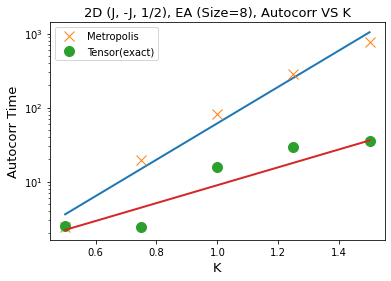

In [208]:
plt.plot(beta_list, np.exp(index_metro*np.array(beta_list) + bias_metro), linewidth=2)
plt.plot(beta_list, autocorr_time_metro_list, 'x', markersize=10, label='Metropolis')
plt.plot(beta_list, autocorr_time_tm_bd_20_list, 'o', markersize=10, label='Tensor(exact)')
plt.plot(beta_list, np.exp(index_tm_bd_20*np.array(beta_list) + bias_tm_bd_20), linewidth=2)
#plt.plot(beta_list, autocorr_time_tm_list, '^', markersize=10, label='Tensor(D=20)')
#plt.plot(beta_list, np.exp(index_tm*np.array(beta_list) + bias_tm), linewidth=2)
plt.yscale('log')
plt.xlabel("K", fontsize=13)
plt.ylabel("Autocorr Time", fontsize=13)
plt.legend()
plt.title("2D (J, -J, 1/2), EA (Size=8), Autocorr VS K", fontsize=13)

-------------------------------------------------
### MH, bond_dim = 2

In [32]:
with open('../data_2d_ea/autocorr_vs_K/full_mh_obc/size_16/j_seed_0/ea_square_size_16_beta_1.000_bd_2_tm_torch_v5.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_beta_0 = data_dict['q_list']

In [33]:
with open('../data_2d_ea/autocorr_vs_K/full_mh_obc/size_16/j_seed_0/ea_square_size_16_beta_1.250_bd_2_tm_torch_v1.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_beta_1 = data_dict['q_list']

In [34]:
with open('../data_2d_ea/autocorr_vs_K/full_mh_obc/size_16/j_seed_0/ea_square_size_16_beta_1.750_bd_2_tm_torch_v3.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_beta_3 = data_dict['q_list']

In [35]:
with open('../data_2d_ea/autocorr_vs_K/full_mh_obc/size_16/j_seed_0/ea_square_size_16_beta_2.000_bd_2_tm_torch_v0.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_beta_4 = data_dict['q_list']

<AxesSubplot:ylabel='Count'>

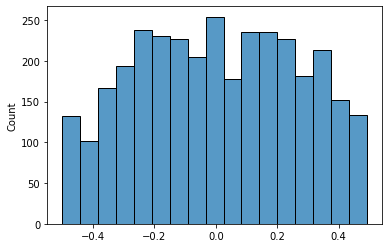

In [102]:
sns.histplot(q_beta_0)

In [38]:
autocorr_q_tm_mean_beta_0, autocorr_q_tm_std_beta_0 = autocorr_est_combine(q_beta_0, (11, 300), steps=100)

In [42]:
autocorr_q_tm_mean_beta_1, autocorr_q_tm_std_beta_1 = autocorr_est_combine(q_beta_1, (11, 300), steps=100)

In [48]:
autocorr_q_tm_mean_beta_3, autocorr_q_tm_std_beta_3 = autocorr_est_combine(q_beta_3, (99, 200), steps=100)

In [51]:
autocorr_q_tm_mean_beta_4, autocorr_q_tm_std_beta_4 = autocorr_est_combine(q_beta_4, (36, 500), steps=100)

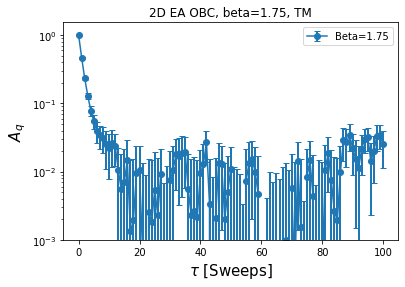

In [54]:
errbar_plot(autocorr_q_tm_mean_beta_3, autocorr_q_tm_std_beta_3, 1.75, f'2D EA OBC, beta=1.75, TM')

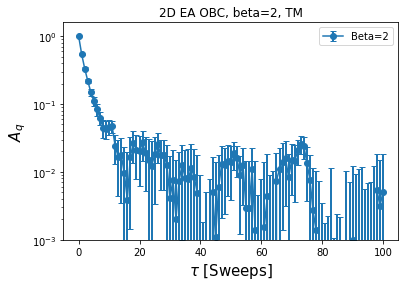

In [52]:
errbar_plot(autocorr_q_tm_mean_beta_4, autocorr_q_tm_std_beta_4, 2, f'2D EA OBC, beta=2, TM')

In [55]:
autocorr_mean_bd_2_list = [autocorr_q_tm_mean_beta_0, autocorr_q_tm_mean_beta_1, 
                           autocorr_q_tm_mean_beta_3, autocorr_q_tm_mean_beta_4]

In [90]:
autocorr_time_bd_2_list = autocorr_time_est_pip(autocorr_mean_bd_2_list, steps=4)

In [104]:
autocorr_time_bd_2_list

[0.7385710026550709,
 0.8656823029533837,
 1.4681572109874315,
 1.9838497264909143]

In [91]:
beta_list_bd_2 = [1, 1.25, 1.75, 2]

In [92]:
index_bd_2, bias_bd_2 = np.polyfit(beta_list_bd_2, np.log(autocorr_time_bd_2_list), 1)

In [96]:
index_bd_2

1.0017599643477775

Text(0.5, 1.0, '2D (J, -J, 1/2), EA (Size=16, OBC), Autocorr VS K')

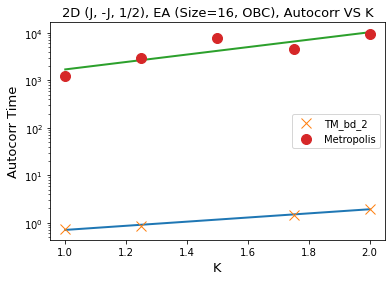

In [153]:
plt.plot(beta_list_bd_2, np.exp(index_bd_2*np.array(beta_list_bd_2)+bias_bd_2), linewidth=2)
plt.plot(beta_list_bd_2, autocorr_time_bd_2_list, 'x', markersize=10, label='TM_bd_2')
plt.plot(beta_list, np.exp(index_metro*np.array(beta_list) + bias_metro), linewidth=2)
plt.plot(beta_list, autocorr_time_metro_list, 'o', markersize=10, label='Metropolis')
plt.yscale('log')
plt.xlabel("K", fontsize=13)
plt.ylabel("Autocorr Time", fontsize=13)
plt.legend()
plt.title("2D (J, -J, 1/2), EA (Size=16, OBC), Autocorr VS K", fontsize=13)

Text(0.5, 1.0, '2D (J, -J, 1/2), EA (Size=16, OBC), Autocorr VS K')

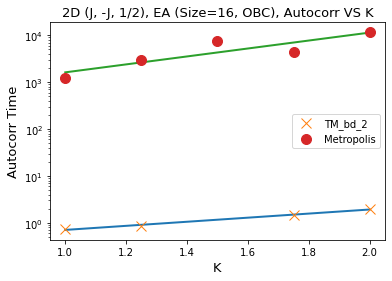

In [125]:
plt.plot(beta_list_bd_2, np.exp(index_bd_2*np.array(beta_list_bd_2)+bias_bd_2), linewidth=2)
plt.plot(beta_list_bd_2, autocorr_time_bd_2_list, 'x', markersize=10, label='TM_bd_2')
plt.plot(beta_list, np.exp(index_metro*np.array(beta_list) + bias_metro), linewidth=2)
plt.plot(beta_list, autocorr_time_metro_list, 'o', markersize=10, label='Metropolis')
plt.yscale('log')
plt.xlabel("K", fontsize=13)
plt.ylabel("Autocorr Time", fontsize=13)
plt.legend()
plt.title("2D (J, -J, 1/2), EA (Size=16, OBC), Autocorr VS K", fontsize=13)

In [154]:
autocorr_time_bd_2_list[-1]

1.9838497264909143

In [155]:
autocorr_time_metro_list[-1]

9392.959993007149

In [403]:
with open('../data_2d_ea/autocorr_vs_K/full_mh_obc/ea_square_size_8/j_seed_0/ea_square_size_8_beta_1.000_bd_2_tm_torch_v1.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_0_tm = data_dict['q_list']

In [510]:
with open('../data_2d_ea/autocorr_vs_K/full_mh_obc/ea_square_size_8/j_seed_0/ea_square_size_8_beta_1.250_bd_2_tm_torch_v2.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_1_tm = data_dict['q_list']

<AxesSubplot:ylabel='Count'>

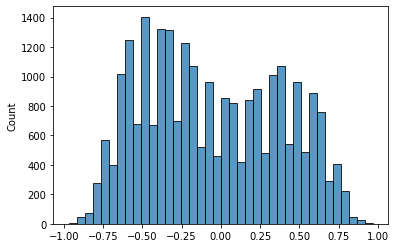

In [511]:
sns.histplot(q_ea2d_beta_1_tm)

In [434]:
with open('../data_2d_ea/autocorr_vs_K/full_mh_obc/ea_square_size_8/j_seed_0/ea_square_size_8_beta_1.500_bd_2_tm_torch_v3.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_2_tmk = data_dict['q_list']

<AxesSubplot:ylabel='Count'>

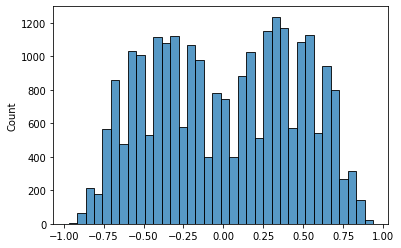

In [435]:
sns.histplot(q_ea2d_beta_2_tmk)

In [410]:
with open('../data_2d_ea/autocorr_vs_K/full_mh_obc/ea_square_size_8/j_seed_0/ea_square_size_8_beta_1.750_bd_2_tm_torch_v4.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_3_tm = data_dict['q_list']

<AxesSubplot:ylabel='Count'>

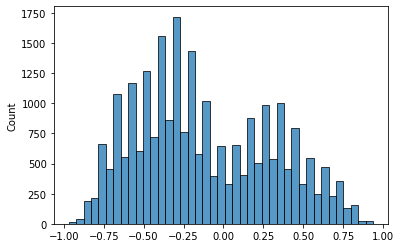

In [436]:
sns.histplot(q_ea2d_beta_3_tm)

In [411]:
with open('../data_2d_ea/autocorr_vs_K/full_mh_obc/ea_square_size_8/j_seed_0/ea_square_size_8_beta_2.000_bd_2_tm_torch_v5.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_4_tm = data_dict['q_list']

<AxesSubplot:ylabel='Count'>

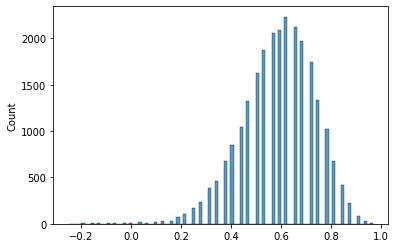

In [437]:
sns.histplot(q_ea2d_beta_4_tm)

In [446]:
data_list = [q_ea2d_beta_1_tm, q_ea2d_beta_2_tm, 
             q_ea2d_beta_3_tm, q_ea2d_beta_4_tm]

In [448]:
autocorr_mean_bd_2_list, autocorr_std_bd_2_list = data_process_pip(data_list, 500, steps=100)

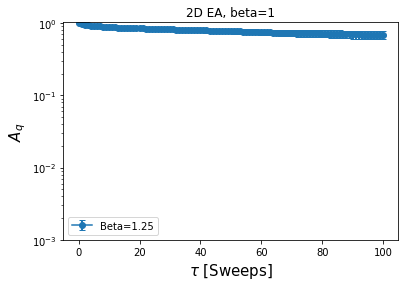

In [451]:
errbar_plot(autocorr_mean_bd_2_list[0], autocorr_std_bd_2_list[0], 1.25, f'2D EA, beta=1')

In [512]:
autocorr_time_bd_2_list = autocorr_time_est_pip(autocorr_mean_bd_2_list, steps=10)

In [513]:
autocorr_time_bd_2_list

[82.51783894617478, 104.95630600627511, 103.80265509017636, 7.218230346552891]

In [260]:
result_tm_bd_2 = data_process_pip(data_list, 500, steps=100)

In [275]:
beta = 1
title_str = f'2D EA, bd = 2, (J, -J, 1/2), Beta={beta}'

In [283]:
errbar_plot(result_tm_bd_2[5][0], result_tm_bd_2[5][0], 1, title_str)

IndexError: list index out of range

In [274]:
result_tm_bd_2[4][0]

array([1.        , 0.77543593, 0.64897501, 0.55222267, 0.47799654,
       0.42060785, 0.37617416, 0.33853755, 0.30358214, 0.27069147,
       0.24711816, 0.22491151, 0.20332361, 0.18732476, 0.17095195,
       0.16081413, 0.1498604 , 0.1382154 , 0.13397034, 0.12739538,
       0.12091561, 0.11470554, 0.10784048, 0.10359316, 0.10219929,
       0.10313533, 0.09601869, 0.09102118, 0.08941653, 0.08604859,
       0.08521681, 0.08193953, 0.07761061, 0.07008828, 0.06491624,
       0.05721259, 0.05126997, 0.04653083, 0.04078539, 0.03498555,
       0.04183475, 0.04700678, 0.04416919, 0.04538627, 0.04632458,
       0.04567411, 0.04870435, 0.04914631, 0.04881767, 0.04964946,
       0.04891966, 0.05328711, 0.04877688, 0.04671441, 0.04388589,
       0.03914675, 0.03333104, 0.03402004, 0.03708881, 0.0406834 ,
       0.04228577, 0.04200927, 0.04033436, 0.03587853, 0.02917665,
       0.02846498, 0.02503132, 0.02110356, 0.01846995, 0.01823424,
       0.01966664, 0.02310937, 0.02392756, 0.0186626 , 0.01446

In [256]:
autocorr_time_beta_0_bd_2_tm = autocorr_time_est(result_tm_bd_2[0][0][:5])
autocorr_time_beta_1_bd_2_tm = autocorr_time_est(result_tm_bd_2[1][0][:5])
autocorr_time_beta_2_bd_2_tm = autocorr_time_est(result_tm_bd_2[2][0][:5])
autocorr_time_beta_3_bd_2_tm = autocorr_time_est(result_tm_bd_2[3][0][:5])
autocorr_time_beta_4_bd_2_tm = autocorr_time_est(result_tm_bd_2[4][0][:5])

In [257]:
autocorr_time_bd_2_list = [autocorr_time_beta_0_bd_2_tm, autocorr_time_beta_1_bd_2_tm, 
                           autocorr_time_beta_2_bd_2_tm, autocorr_time_beta_3_bd_2_tm, 
                           autocorr_time_beta_4_bd_2_tm]

In [258]:
autocorr_time_bd_2_list

[27.793665315460377,
 53.53682144984705,
 64.98903318097203,
 63.20259842608155,
 5.507282473181502]

In [488]:
with open('../data_2d_ea/autocorr_vs_K/full_mh_obc/ea_square_size_8/j_seed_0/ea_square_size_8_beta_1.000_bd_4_tm_torch_v1.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_0_tm = data_dict['q_list']

In [489]:
with open('../data_2d_ea/autocorr_vs_K/full_mh_obc/ea_square_size_8/j_seed_0/ea_square_size_8_beta_1.250_bd_4_tm_torch_v2.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_1_tm = data_dict['q_list']

In [490]:
with open('../data_2d_ea/autocorr_vs_K/full_mh_obc/ea_square_size_8/j_seed_0/ea_square_size_8_beta_1.500_bd_4_tm_torch_v3.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_2_tm = data_dict['q_list']

In [491]:
with open('../data_2d_ea/autocorr_vs_K/full_mh_obc/ea_square_size_8/j_seed_0/ea_square_size_8_beta_1.750_bd_4_tm_torch_v4.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_3_tm = data_dict['q_list']

In [492]:
with open('../data_2d_ea/autocorr_vs_K/full_mh_obc/ea_square_size_8/j_seed_0/ea_square_size_8_beta_2.000_bd_4_tm_torch_v5.pkl', 'rb') as file:
    data_dict = pickle.load(file)
    q_ea2d_beta_4_tm = data_dict['q_list']

In [495]:
data_list = [q_ea2d_beta_0_tm, q_ea2d_beta_1_tm, q_ea2d_beta_2_tm, q_ea2d_beta_3_tm, q_ea2d_beta_4_tm]

In [497]:
autocorr_mean_bd_4_list, autocorr_std_bd_4_list = data_process_pip(data_list, 500, steps=100)

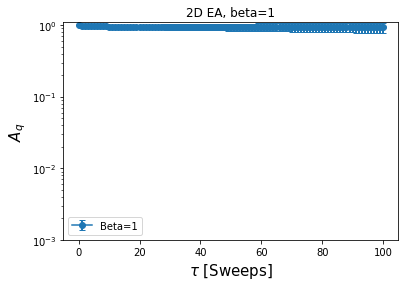

In [502]:
errbar_plot(autocorr_mean_bd_4_list[3], autocorr_std_bd_4_list[3], 1, f'2D EA, beta=1')

In [503]:
autocorr_time_bd_4_list = autocorr_time_est_pip(autocorr_mean_bd_4_list, steps=50)

In [504]:
autocorr_time_bd_4_list

[80.37280245133978,
 175.34469844868832,
 545.3553962534475,
 1443.7937007338733,
 17.53230611751491]

In [295]:
autocorr_time_beta_0_bd_4_tm = autocorr_time_est(result_tm_bd_4[0][0][:5])
autocorr_time_beta_1_bd_4_tm = autocorr_time_est(result_tm_bd_4[1][0][:5])
autocorr_time_beta_2_bd_4_tm = autocorr_time_est(result_tm_bd_4[2][0][:5])
autocorr_time_beta_3_bd_4_tm = autocorr_time_est(result_tm_bd_4[3][0][:5])
autocorr_time_beta_4_bd_4_tm = autocorr_time_est(result_tm_bd_4[4][0][:5])

In [296]:
autocorr_time_bd_4_list = [autocorr_time_beta_0_bd_4_tm, autocorr_time_beta_1_bd_4_tm, 
                           autocorr_time_beta_2_bd_4_tm, autocorr_time_beta_3_bd_4_tm, 
                           autocorr_time_beta_4_bd_4_tm]

In [297]:
autocorr_time_bd_4_list

[22.944547519905377,
 40.82435563249898,
 61.36281695138192,
 111.73004354513486,
 5.608707383726466]